# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [11]:
# get percentage of each class
results["actual"].value_counts() / results.shape[0] * 100

actual
1.0    60.0
0.0    40.0
Name: count, dtype: float64

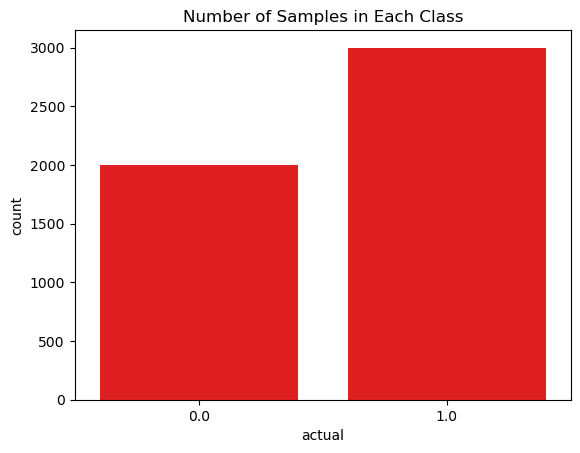

In [12]:
# barplot for each class count
sns.countplot(x=results["actual"], color="red")
plt.title("Number of Samples in Each Class")
plt.show()

Well, there is a class imbalance problem. In fact, 60% of the samples belong to one class. So, if i predicted 1 every single time, I would be correct 60% of the times. This is a problem.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

In [13]:
results

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988
...,...,...
4995,0.0,0.109184
4996,1.0,0.920730
4997,1.0,0.899630
4998,0.0,0.198838


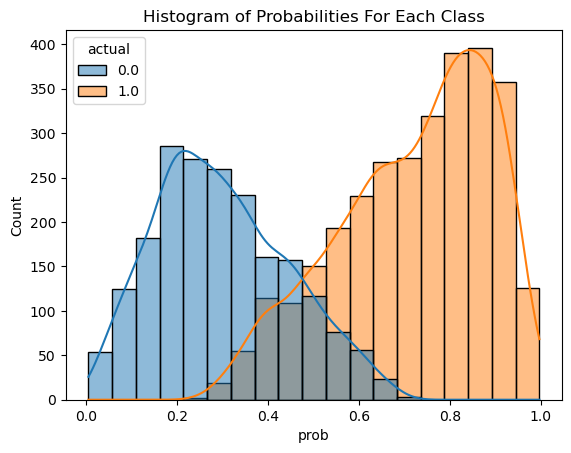

In [15]:
sns.histplot(x="prob", color="red", hue="actual", kde=True, data=results)
plt.title("Histogram of Probabilities For Each Class")
plt.show()

The distribution of proabilities for each class look well seperated. Some samples between both classes are mixed between 0.3 and 0.6, indicating that model is mixing things up a lot in this range. However, when a model is returning low or high probabilits, it is generally very correct. If we shift probability threshold slightly to the right for classification, this model could be able to distinguish between classes very well.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [18]:
# making ppredictions based on predetermined classification threshold
results["pred"] = results["prob"] > 0.5
results["pred"] = results["pred"].astype(int)

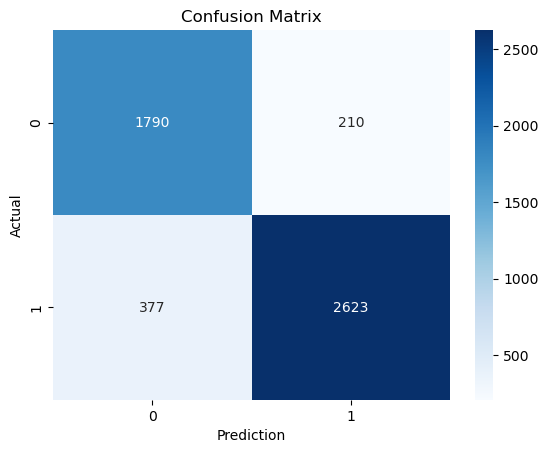

In [ ]:
from sklearn.metrics import confusion_matrix

# get confusion matrix
cm = confusion_matrix(results["actual"], results["pred"])

# create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

It looks like the model is classifying majority of positive and negative classes correctly. The mopdel is making 337 samples that are actually 1 as 0 and 210 which are actuall 0 were predicted as 1. Nonetheless, the model is very good at classifying and seperating two classes correctly with the classification threshold set at 0.5.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [26]:
# access True positive, True negative, False positive, and False negative
TN, FP, FN, TP = cm.ravel()

In [27]:
# calculate precision
precision = TP / (TP + FP)

# calculate recall
recall = TP / (TP + FN)

# calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

In [28]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 0.9258736321920226
Recall: 0.8743333333333333
Accuracy: 0.8826


The model's precision is very high, at 0.92. Accuracy might not be the best metric to use as the dataset is not balanced. There exists a class imbalance. To choose between precision and recall depends upon our problem statement. If we care more about FP and not FN (meaning that if model makes a positive prediction, it better be right), precision is a better choice, and if my job is to focus more on reducing false negatives and we don't care about FP, I would choose recall. It depends entirely on the problem statement. I can't decide what to choose here because I don't know what the labels mean. Regardless, I would follow the abovementioned principle to choose between precision and recall.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# get false positive and true positive rates at classification thresholds
fpr, tpr, thresholds = roc_curve(results["actual"], results["prob"])

In [33]:
# get AUC score
auc_score = roc_auc_score(results["actual"], results["prob"])
print(f"AUC Score: {auc_score}")

AUC Score: 0.9626625


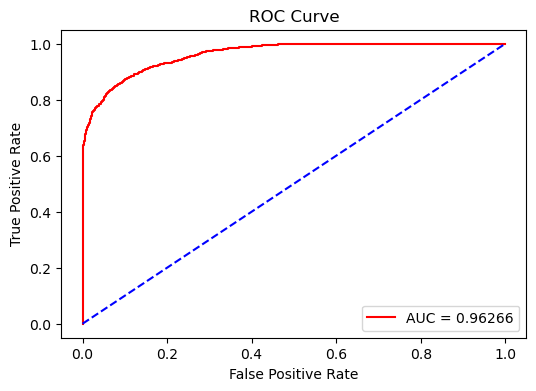

In [37]:
# plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.5f}', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The AUC score of 0.96 indicates that the model is very good at distinguishing between two classes. Here, if we randomly select a positive and negative sample, the classifier will have a ~96% chance of rankung the positive sample higher than the negative sample in terms of the predicted probability of the model. Essentially, it is very capable of distinguishing between two classes. If we look at the ROC curve, we can see that the curve is achieving diminishing increment in TPR at around 0.8, but after that point, the FPR starts to increase significantly. 